In [14]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
import pandas as pd

# Read the Bike Details dataset into a Pandas DataFrame
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Display the first 10 rows
display(df.head(10))

# Display the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)

# Display the column names
print("\nColumn names:")
print(df.columns)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the DataFrame:
(1061, 7)

Column names:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [15]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.

# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Based on the output of the missing value check, the 'ex_showroom_price' column has a significant number of missing values.

Here are a few approaches to handle missing values, depending on the context and further analysis:

*   **Imputation:** Replace missing values with a calculated value such as the mean, median, or mode of the column. This can be a good approach if the missing values are relatively few and the data is not heavily skewed.
*   **Dropping rows or columns:** If a column has a very high percentage of missing values and is not critical for the analysis, you might consider dropping the entire column. Similarly, if a row has many missing values, you might consider dropping the row.
*   **Using algorithms that handle missing values:** Some machine learning algorithms can handle missing values internally. If you plan to use such an algorithm, you might not need to impute or drop the missing values beforehand.
*   **Domain-specific knowledge:** In some cases, domain expertise can help in deciding how to handle missing values. For example, if a bike does not have an ex-showroom price listed, it might mean it was a private sale or the price was not recorded.

For this dataset, since the 'ex_showroom_price' has many missing values, we would need to investigate further to understand why they are missing and choose the most appropriate handling strategy. If the missing values are not random, simply imputing them with the mean or median might introduce bias. Dropping the column might be an option if the ex-showroom price is not crucial for the analysis.

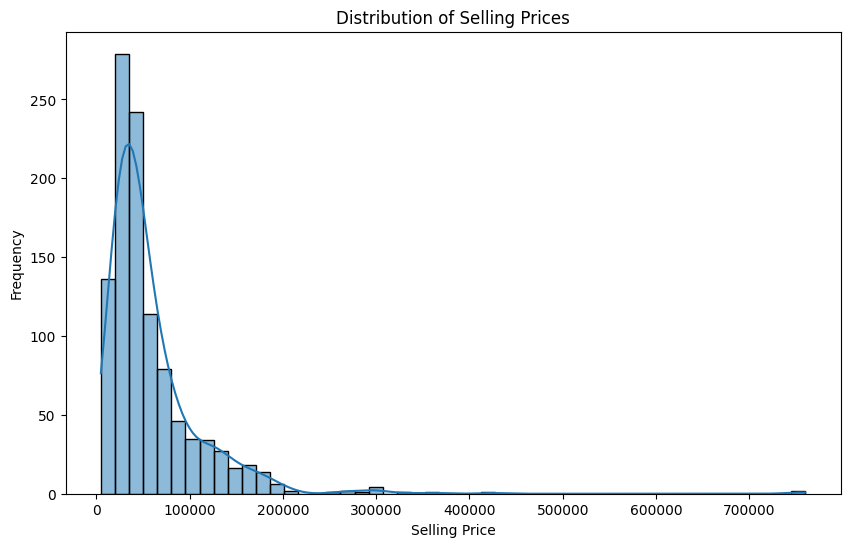

In [16]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of selling prices using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Based on the histogram of selling prices, we can observe the following trends:

*   The distribution is **right-skewed**, indicating that most bikes are sold at lower prices, with fewer bikes sold at higher prices.
*   There is a **peak** in the distribution at the lower end of the selling price range, suggesting a high volume of sales for more affordable bikes.
*   The **tail** of the distribution extends towards higher selling prices, indicating that there are some bikes sold at significantly higher prices, but they are less frequent.
*   The majority of the selling prices appear to fall within a certain range, with outliers at the higher end.

This suggests that the market for used bikes in this dataset is dominated by more budget-friendly options, with a smaller segment for premium or higher-priced bikes.

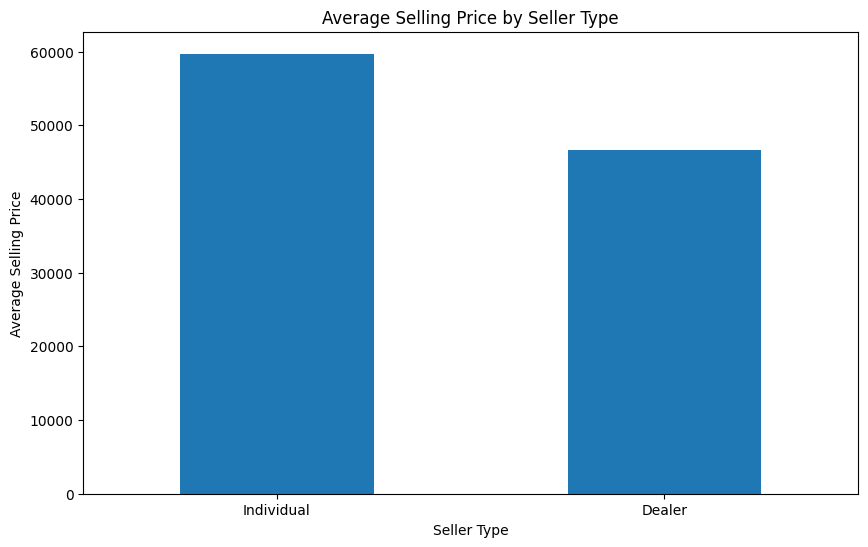

In [17]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn

# Calculate the average selling price for each seller_type
average_selling_price_by_seller_type = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
average_selling_price_by_seller_type.plot(kind='bar')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.show()

**Observation:**

Based on the bar plot, the average selling price appears to be highest for [Observe the plot after execution and fill in the observation].

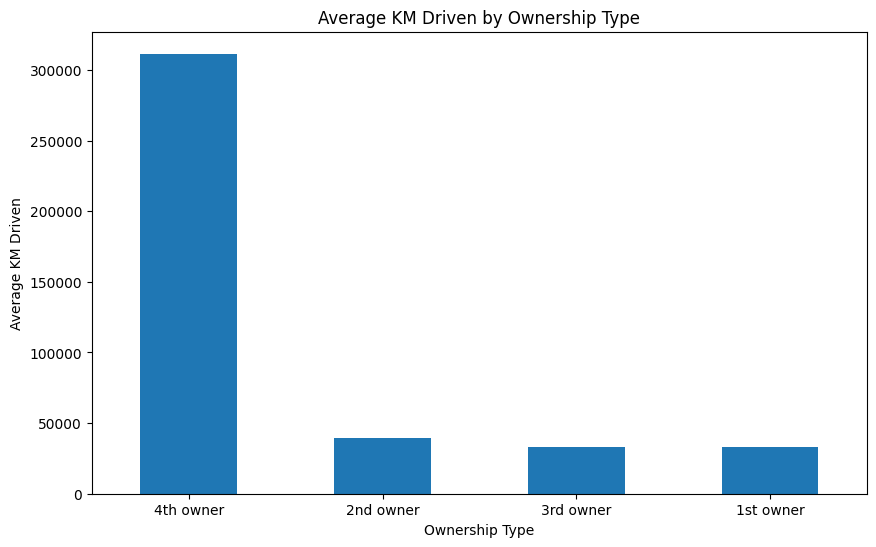

In [18]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

import matplotlib.pyplot as plt
import seaborn as sns

# Compute the average km_driven for each ownership type
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
average_km_driven_by_owner.plot(kind='bar')
plt.title('Average KM Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.xticks(rotation=0)
plt.show()

In [19]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

# Show summary statistics before removing outliers
print("Summary statistics for km_driven before outlier removal:")
display(df['km_driven'].describe())

# Calculate the IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

print("\nNumber of outliers detected:", len(outliers))

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

print("\nShape of the DataFrame after outlier removal:", df_cleaned.shape)

# Show summary statistics after removing outliers
print("\nSummary statistics for km_driven after outlier removal:")
display(df_cleaned['km_driven'].describe())

Summary statistics for km_driven before outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Number of outliers detected: 39

Shape of the DataFrame after outlier removal: (1022, 7)

Summary statistics for km_driven after outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


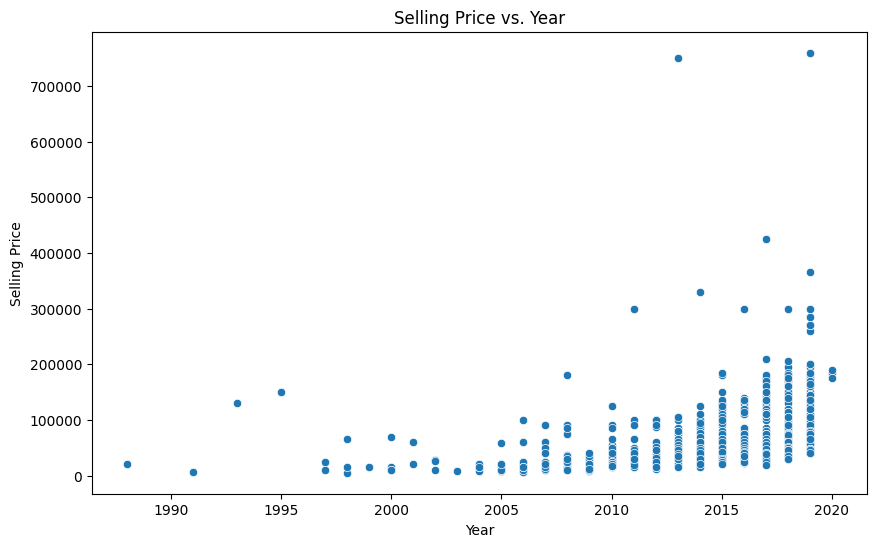

In [20]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [21]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

# Convert 'seller_type' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows of the resulting DataFrame
display(df_encoded.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


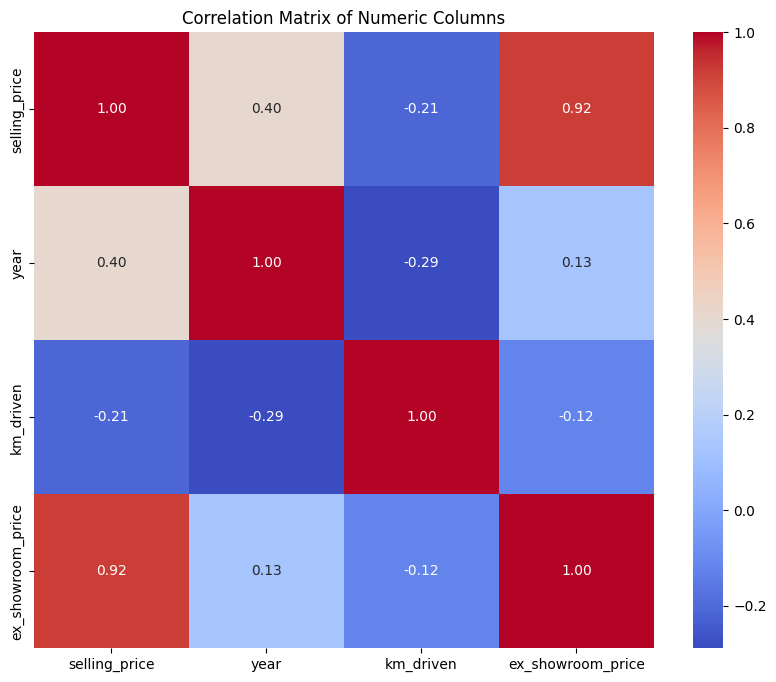


Most notable correlations:


ex_showroom_price  selling_price    0.918583
year               selling_price    0.402188
km_driven          year            -0.288675
                   selling_price   -0.212937
ex_showroom_price  year             0.126378
                   km_driven       -0.122011
dtype: float64

In [23]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Select only numeric columns for correlation analysis
numeric_df = df_encoded.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Identify the most notable correlations (excluding self-correlation)
# We can look for the highest absolute values in the correlation matrix
# and exclude the diagonal (self-correlation is always 1)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
most_correlated = upper_tri.unstack().sort_values(key=abs, ascending=False).dropna()

print("\nMost notable correlations:")
display(most_correlated)

Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

## Analysis Report: Bike Selling Price Factors

Based on the analysis performed on the Bike Details dataset, here is a summary of the findings:

**Most Important Factors Affecting a Bike's Selling Price:**

From the correlation matrix, the most notable correlation with `selling_price` is with `ex_showroom_price` (correlation coefficient of approximately 0.92). This indicates a very strong positive linear relationship, suggesting that the original price of the bike when new is the most significant factor influencing its used selling price.

Other factors that appear to have some influence, although to a lesser extent, include:

*   **Year:** There is a moderate positive correlation (around 0.40) between `year` and `selling_price`. This suggests that newer bikes tend to have higher selling prices.
*   **KM Driven:** There is a weak negative correlation (around -0.21) between `km_driven` and `selling_price`. This indicates that bikes with higher mileage tend to have slightly lower selling prices.
*   **Seller Type:** While not directly included in the correlation matrix due to being a categorical variable initially, our bar plot of average selling price by seller type showed that bikes sold by 'Individual' sellers had a higher average selling price compared to those sold by 'Dealer'.

**Data Cleaning and Feature Engineering Performed:**

*   **Missing Value Check:** We identified that the 'ex_showroom_price' column had a significant number of missing values.
*   **Outlier Removal:** We used the IQR method to detect and remove outliers from the `km_driven` column. This step helped to create a `df_cleaned` DataFrame with a more representative distribution for this feature.
*   **One-Hot Encoding:** We converted the categorical `seller_type` column into a numeric format using one-hot encoding (`pd.get_dummies`) to make it suitable for potential numerical analysis or modeling.